In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [91]:
start ='2012-01-01'
end ='2022-12-21'
stock ='GOOG'

data =yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [92]:
data.reset_index(inplace=True)

In [93]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131855,16.379533,16.126146,16.358437,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.968765,96.871931,93.603675,95.197945,26452900
2757,2022-12-15,90.873482,93.693352,90.106242,93.205108,28298800
2758,2022-12-16,90.534698,91.421511,89.687743,90.873478,48485500


In [94]:
ma_100_days=data.Close.rolling(100).mean()

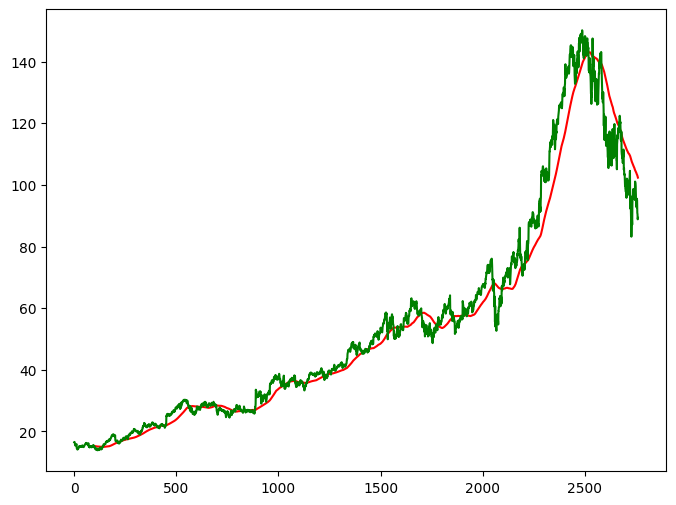

In [95]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [96]:
ma_200_days=data.Close.rolling(200).mean()

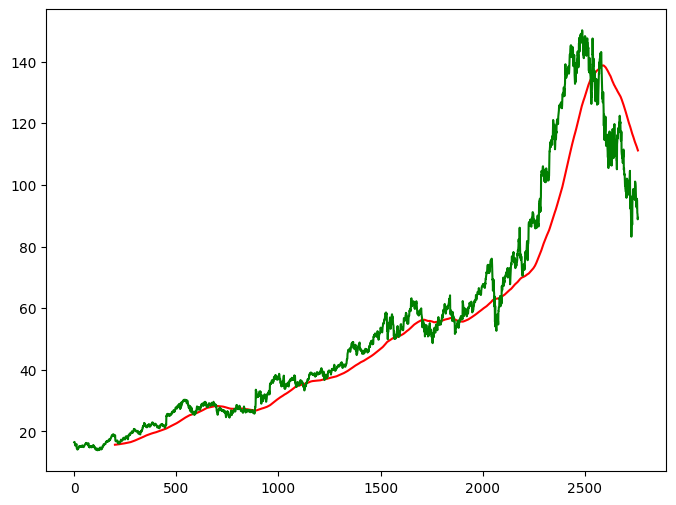

In [97]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [98]:
data.dropna(inplace=True)

In [99]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test =pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [100]:
data_train.shape[0]

2208

In [101]:
data_test.shape[0]

553

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))

In [103]:
data_train_scale =scaler.fit_transform(data_train)

In [104]:
x =[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [105]:
#creating model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [106]:
x,y=np.array(x),np.array(y)

In [109]:
model = Sequential()#layers
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=120, activation='relu'))
model.add(Dense(units= 1))


In [110]:
model.compile(optimizer = 'adam',loss ='mean_squared_error')

In [111]:
model.fit(x,y, epochs=50, batch_size= 32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 259ms/step - loss: 0.0592
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step - loss: 0.0027
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - loss: 0.0029
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 251ms/step - loss: 0.0019
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - loss: 0.0021
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - loss: 0.0020
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step - loss: 0.0021
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 258ms/step - loss: 0.0018
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 260ms/step - loss: 0.0016
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - loss: 0.0017
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 256ms/step - loss: 0.0017
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 252ms/step - loss: 0.0014
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 261ms/step - loss: 0.0014
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - loss: 0.0014
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [112]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_37 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_38 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_39 (LSTM)                       │ (None, 100, 80)             │          51,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_40 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 690,845 (2.64 MB)

 Trainable params: 230,281 (899.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 460,564 (1.76 MB)

In [122]:
pas_100_days = data_train.tail(100)

In [123]:
data_test = pd.concat([pas_100_days,data_test],ignore_index = True)

In [127]:
data_test_scale = scaler.fit_transform(data_test)

In [129]:
x =[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y =np.array(x),np.array(y)
    

In [130]:
y_predict = model.predict(x)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step 


In [134]:
scale = 1/scaler.scale_

In [136]:
y_predict =y_predict*scale

In [137]:
y = y*scale

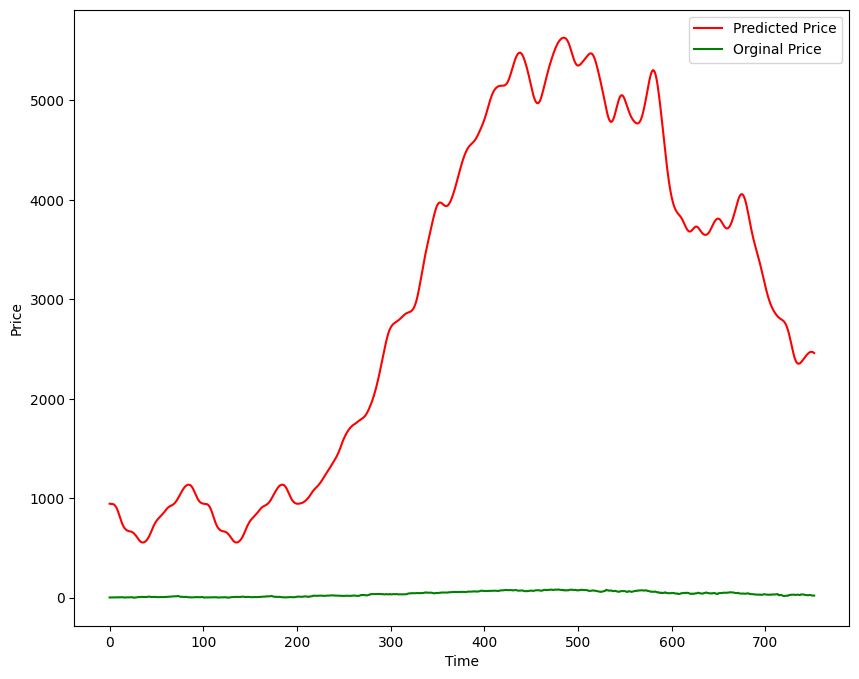

In [139]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r' ,label='Predicted Price')
plt.plot(y, 'g' , label ='Orginal Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [140]:
model.save('Stock Predictions Model.keras')